In [4]:
import numpy as np
import pandas as pd

In [5]:
file_path = 'ConsumoCo2.csv'
data = pd.read_csv(file_path)

In [6]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
x = data[['ENGINESIZE', 'FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [18]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 score: {r2}")
print(f"(mse): {mse}")
print(f"(mae): {mae}")

R2 score: 0.867784802173665
(mse): 533.2896058694516
(mae): 16.865040434653615


In [19]:
import matplotlib.pyplot as plt


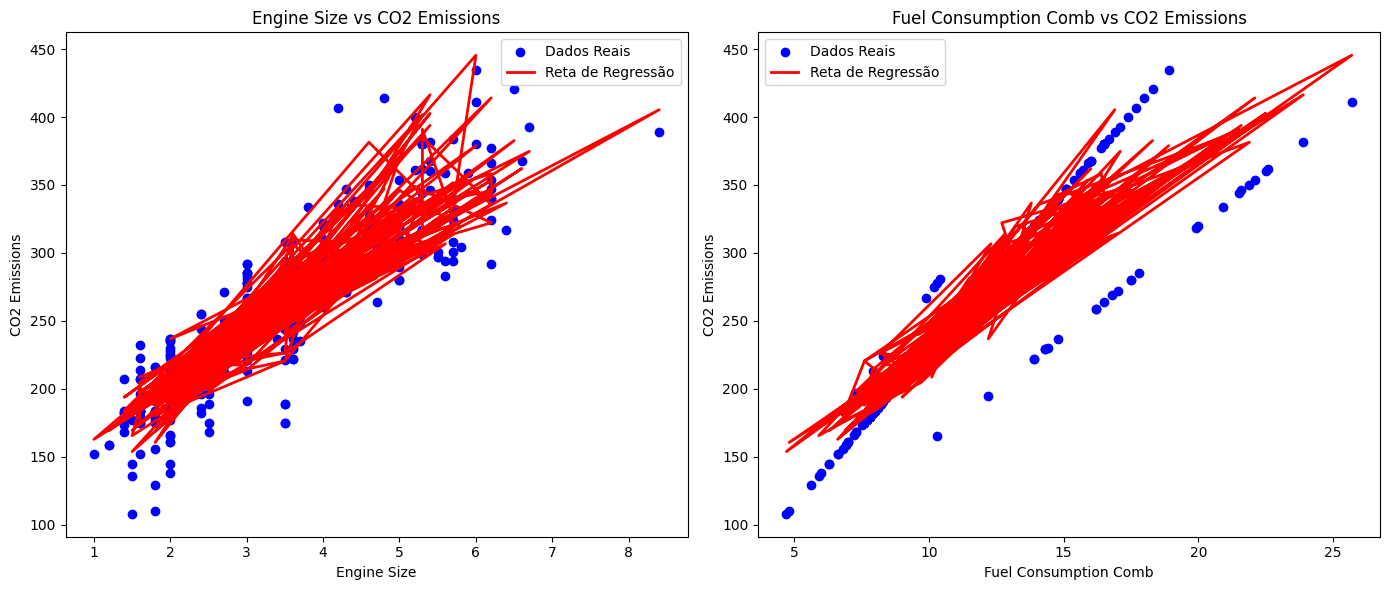

In [22]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_test['ENGINESIZE'], y_test, color='blue', label='Dados Reais')
plt.plot(x_test['ENGINESIZE'], y_pred, color='red', linewidth=2, label='Reta de Regressão')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Engine Size vs CO2 Emissions')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test['FUELCONSUMPTION_COMB'], y_test, color='blue', label='Dados Reais')
plt.plot(x_test['FUELCONSUMPTION_COMB'], y_pred, color='red', linewidth=2, label='Reta de Regressão')
plt.xlabel('Fuel Consumption Comb')
plt.ylabel('CO2 Emissions')
plt.title('Fuel Consumption Comb vs CO2 Emissions')
plt.legend()

plt.tight_layout()
plt.show()